# 数据读取

In [1]:
# 导入results
import pickle

with open('Results/RF_results.pkl', 'rb') as f:
    results = pickle.load(f)


In [2]:
results

{'Baseline': [48.059939781824745,
  26.277043342590332,
  22.990478078524273,
  10.239481210708618,
  7.858094731966655,
  7.2449847261110945,
  6.704507827758789,
  6.665280004342397,
  6.2505788405736284,
  6.075175801912944],
 'Baseline + all 5 features': [153.16015179951987,
  123.15885734558105,
  99.04305362701416,
  79.9144213994344,
  65.04343907038371,
  53.89178705215454,
  45.378665844599404,
  39.219042817751564,
  34.85426505406698,
  31.81643635034561],
 'Baseline + feature BH': [140.77334213256836,
  102.52914365132649,
  75.48126029968262,
  57.12595303853353,
  45.024525006612144,
  37.395341873168945,
  32.83543221155802,
  30.225390434265137,
  28.76300621032715,
  27.90386740366618],
 'Baseline + feature BV': [167.17888577779135,
  135.4081827799479,
  109.65930938720703,
  88.93523534138997,
  72.64246145884196,
  60.140332063039146,
  50.657493591308594,
  43.66521962483724,
  38.70689630508423,
  35.18979565302531],
 'Baseline + feature CNM': [166.8214848836263,


In [3]:
len(results)

7

In [5]:
results.pop('Baseline')

[48.059939781824745,
 26.277043342590332,
 22.990478078524273,
 10.239481210708618,
 7.858094731966655,
 7.2449847261110945,
 6.704507827758789,
 6.665280004342397,
 6.2505788405736284,
 6.075175801912944]

In [6]:
len(results)

6

In [7]:
results

{'Baseline + all 5 features': [153.16015179951987,
  123.15885734558105,
  99.04305362701416,
  79.9144213994344,
  65.04343907038371,
  53.89178705215454,
  45.378665844599404,
  39.219042817751564,
  34.85426505406698,
  31.81643635034561],
 'Baseline + feature BH': [140.77334213256836,
  102.52914365132649,
  75.48126029968262,
  57.12595303853353,
  45.024525006612144,
  37.395341873168945,
  32.83543221155802,
  30.225390434265137,
  28.76300621032715,
  27.90386740366618],
 'Baseline + feature BV': [167.17888577779135,
  135.4081827799479,
  109.65930938720703,
  88.93523534138997,
  72.64246145884196,
  60.140332063039146,
  50.657493591308594,
  43.66521962483724,
  38.70689630508423,
  35.18979565302531],
 'Baseline + feature CNM': [166.8214848836263,
  130.17087618509927,
  100.13916301727295,
  78.32779725392659,
  62.69991143544515,
  51.64361572265625,
  44.053227265675865,
  38.87248023351034,
  35.52459144592285,
  33.43680238723755],
 'Baseline + feature LAI': [127.7675

In [8]:
from matplotlib import pyplot as plt

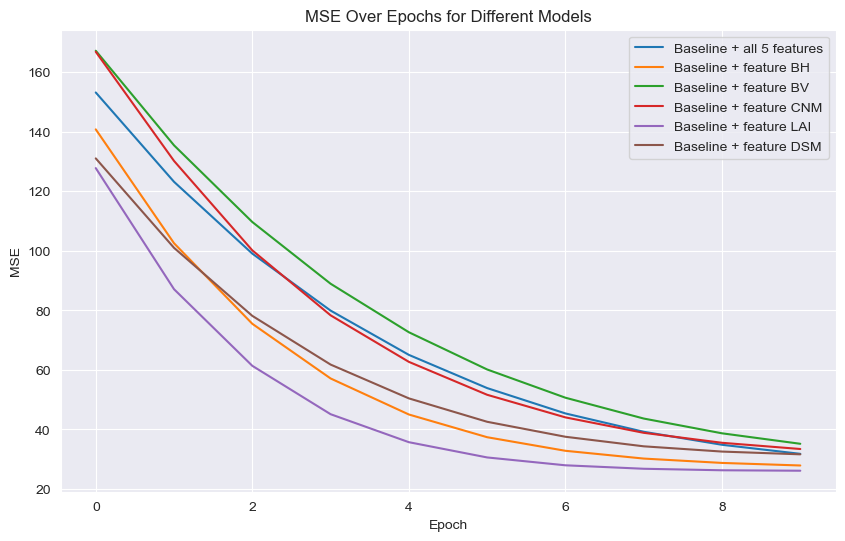

In [10]:
# 绘制 MSE 随 epoch 变化的折线图
plt.figure(figsize=(10, 6))
for key in results.keys():
    plt.plot(results[key], label=key)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE Over Epochs for Different Models')
plt.legend()

plt.savefig('CNN_LSTM_Images/MSE_plot_6.png')

plt.show()


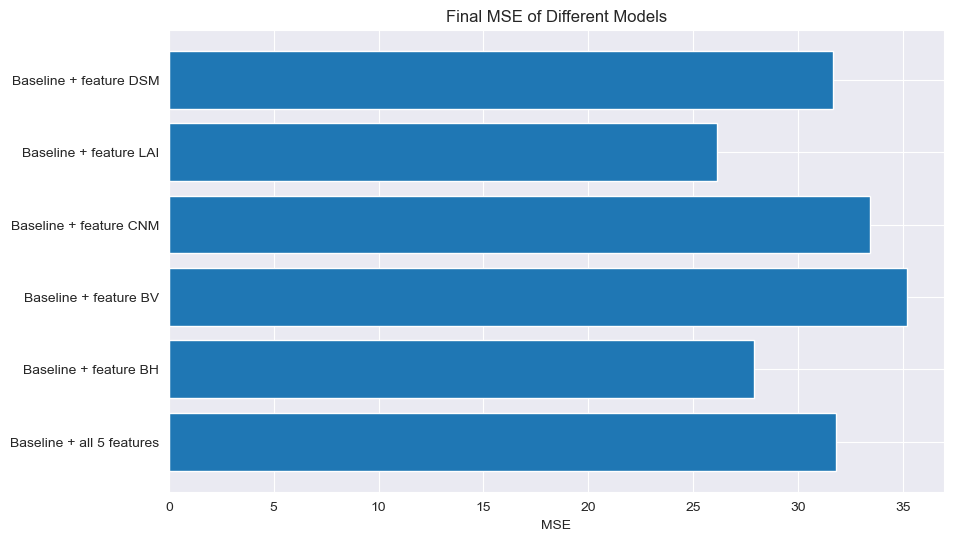

In [11]:
#绘制最终MSE值的条形图

# 取最后一个epoch的MSE值
final_mse = {key: values[-1] for key, values in results.items()}

plt.figure(figsize=(10, 6))
plt.barh(list(final_mse.keys()), list(final_mse.values()))
plt.xlabel('MSE')
plt.title('Final MSE of Different Models')

plt.savefig('CNN_LSTM_Images/Final_MSE_barplot_6.png')
plt.show()


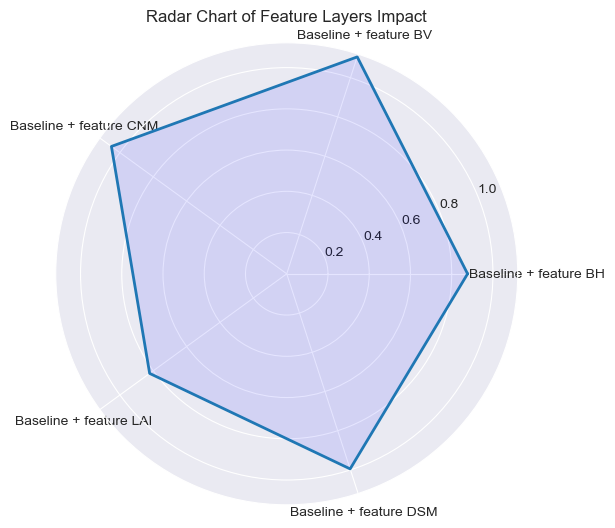

In [13]:
# 绘制雷达图
import numpy as np
from math import pi

# 基线和各个特征层的最终MSE值
labels = list(final_mse.keys())[1:]  # 去除Baseline和Baseline + all 5 features
values = list(final_mse.values())[1:]

# 添加Baseline + all 5 features的MSE为雷达图中心点
baseline_all = final_mse['Baseline + all 5 features']
values = [v / baseline_all for v in values]

angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
values += values[:1]
angles += angles[:1]

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], labels)

ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)

plt.title('Radar Chart of Feature Layers Impact')

plt.savefig('CNN_LSTM_Images/Radar_chart_6.png')

plt.show()


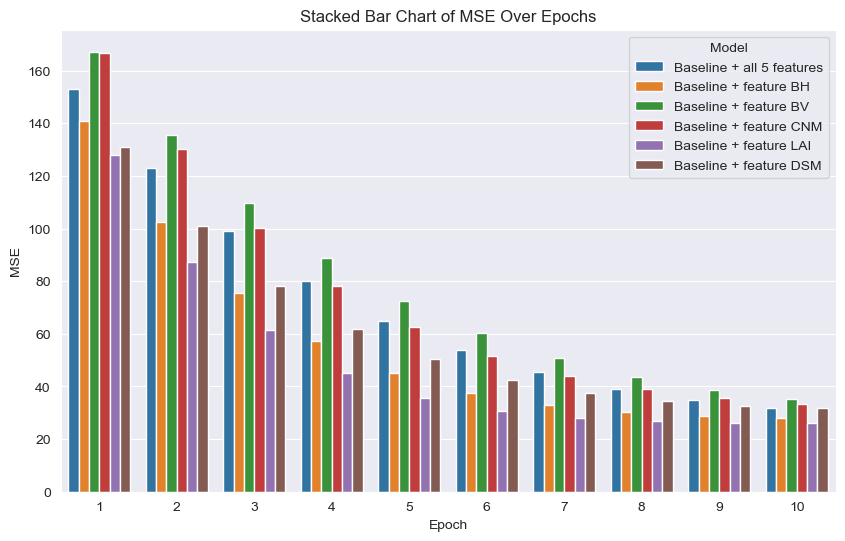

In [15]:
# 绘制堆叠条形图
import pandas as pd
import seaborn as sns

epochs = list(range(1, 11))
df = {key: results[key] for key in results.keys()}
df['Epoch'] = epochs

df = pd.DataFrame(df)

df_melted = df.melt(id_vars='Epoch', var_name='Model', value_name='MSE')

plt.figure(figsize=(10, 6))
sns.barplot(x='Epoch', y='MSE', hue='Model', data=df_melted)
plt.title('Stacked Bar Chart of MSE Over Epochs')

plt.savefig('CNN_LSTM_Images/Stacked_barplot_6.png')

plt.show()


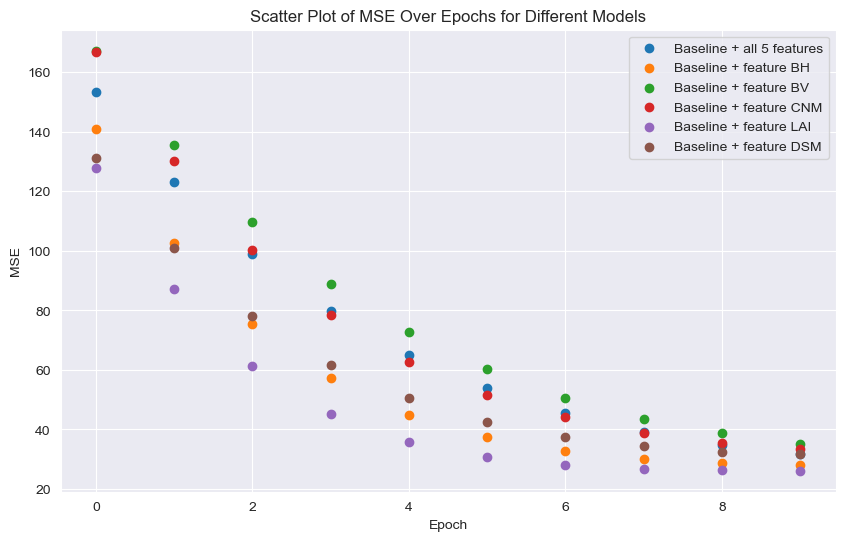

In [16]:
# 绘制影响值的堆叠条形图
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for key in results.keys():
    plt.scatter(range(len(results[key])), results[key], label=key)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Scatter Plot of MSE Over Epochs for Different Models')
plt.legend()

plt.savefig('CNN_LSTM_Images/Scatter_plot_6.png')
plt.show()


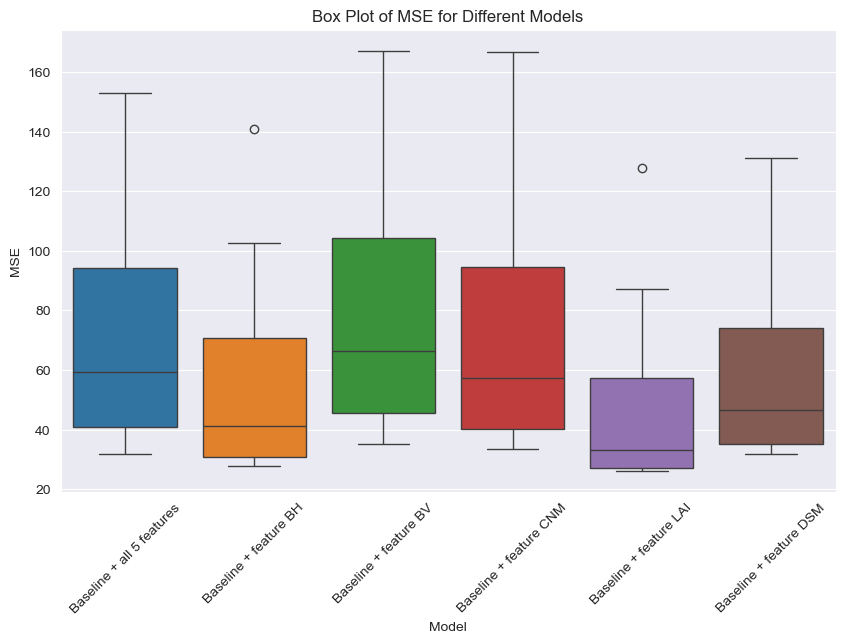

In [17]:
# 绘制箱线图

import seaborn as sns
import pandas as pd

# 将数据转换为DataFrame以便绘图
df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Box Plot of MSE for Different Models')
plt.xticks(rotation=45)

plt.savefig('CNN_LSTM_Images/Box_plot_6.png')

plt.show()


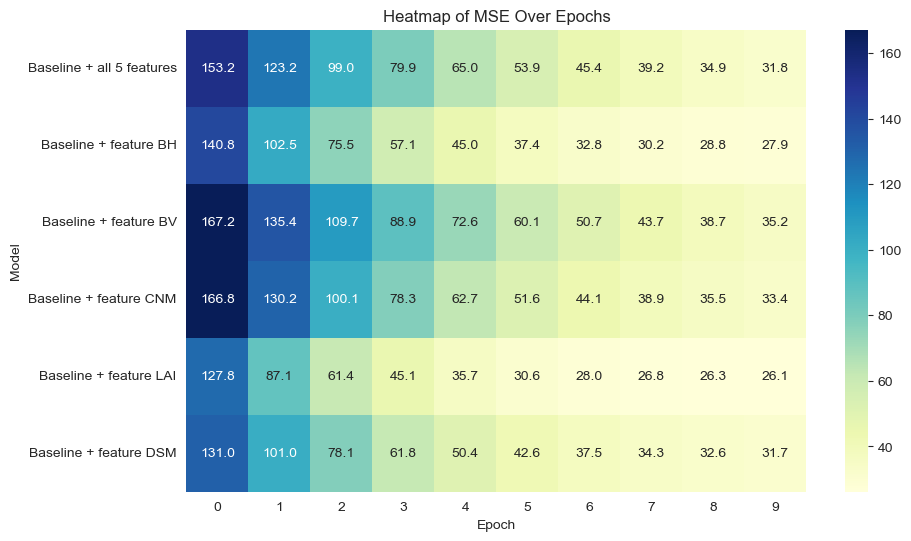

In [18]:
# 绘制热力图
import seaborn as sns

# 创建一个DataFrame，X轴为Epoch，Y轴为模型名，值为MSE
heatmap_data = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.T, annot=True, fmt=".1f", cmap="YlGnBu")
plt.xlabel('Epoch')
plt.ylabel('Model')
plt.title('Heatmap of MSE Over Epochs')

plt.savefig('CNN_LSTM_Images/Heatmap_6.png')

plt.show()


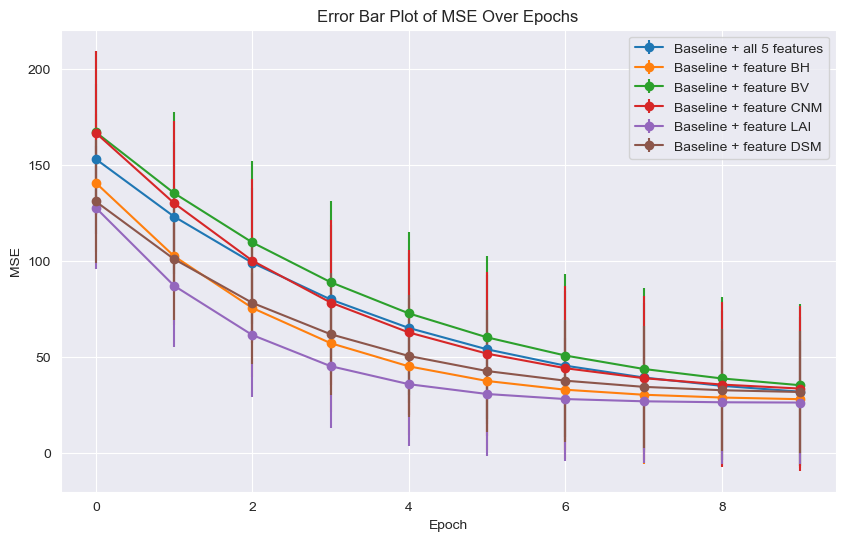

In [19]:
# 绘制误差线图
import numpy as np

plt.figure(figsize=(10, 6))
for key in results.keys():
    mse_values = np.array(results[key])
    mean = mse_values.mean()
    std = mse_values.std()
    plt.errorbar(range(len(mse_values)), mse_values, yerr=std, label=key, fmt='-o')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Error Bar Plot of MSE Over Epochs')
plt.legend()

plt.savefig('CNN_LSTM_Images/Error_bar_plot_6.png')

plt.show()


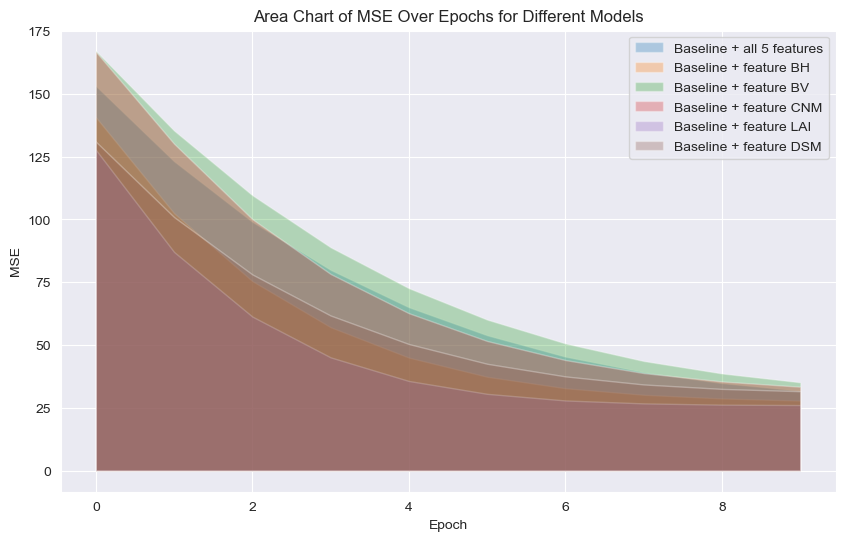

In [20]:
# 绘制面积图
plt.figure(figsize=(10, 6))
for key in results.keys():
    plt.fill_between(range(len(results[key])), results[key], label=key, alpha=0.3)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Area Chart of MSE Over Epochs for Different Models')
plt.legend()

plt.savefig('CNN_LSTM_Images/Area_chart_6.png')

plt.show()


## 模型影响值分析

$$
InfluenceValue_{i} = MSE_{Baseline + i} - MSE_{Baseline + all 5 features}
$$
$$
InfluenceValue_{i} = MSE_{Baseline + all 5 features} - MSE_{Baseline + i}
$$

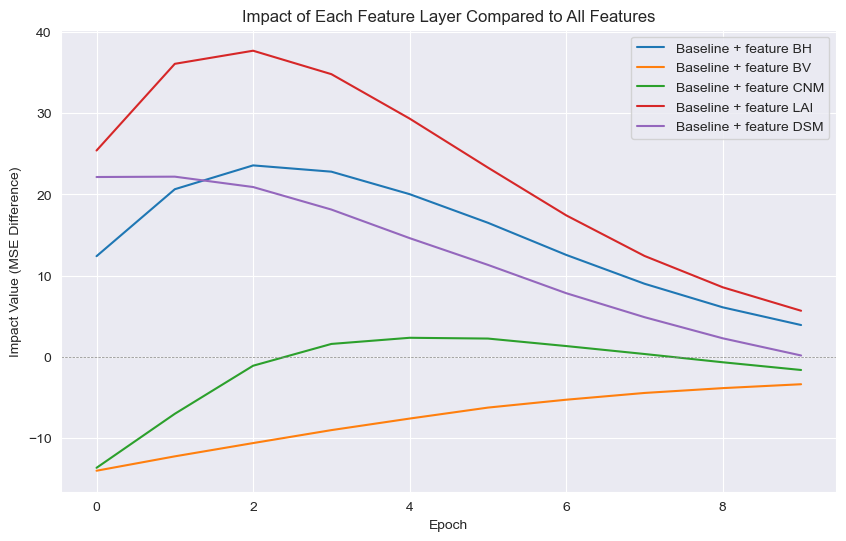

In [42]:
# 计算影响值
impact_values = {}
baseline_all = np.array(results['Baseline + all 5 features'])

for key in results.keys():
    if key != 'Baseline' and key != 'Baseline + all 5 features':
        impact_values[key] = baseline_all - np.array(results[key])

# 绘制影响值
plt.figure(figsize=(10, 6))
for key in impact_values.keys():
    plt.plot(impact_values[key], label=key)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Epoch')
plt.ylabel('Impact Value (MSE Difference)')
plt.title('Impact of Each Feature Layer Compared to All Features')
plt.legend()

plt.savefig('CNN_LSTM_Images/Impact_plot_6.png')
plt.show()


这张图展示了每个特征层（如BH、BV、CNM、LAI、DSM）相对于所有特征层（Baseline + all 5 features）的影响值（即MSE差异）。具体含义如下：

Y轴：表示影响值，数值越大表明该特征层对模型预测的贡献越小，甚至可能引入了噪声；数值越小（负值）表明该特征层对预测有更好的提升。
X轴：表示训练的epoch数。
各条线：代表每个特征层相对于Baseline + all 5 features的MSE差异。比如，Baseline + feature LAI的曲线从负值开始，表明在训练初期LAI层对模型有负面影响，随着epoch增加，其影响逐渐减小。
从图中可以观察到：

大部分特征层相对于所有特征层的MSE在初期都有一个较大的差值，这可能是因为模型在初期还未充分学习特征。
随着训练的进行，Baseline + feature BV始终对模型产生了负面影响（MSE差值为正），说明BV层对预测效果有负面作用。
而Baseline + feature LAI的MSE值虽然在初期有较大的负面影响，但随着训练的进行，影响值逐渐减少，甚至接近于零，表明这个特征层在后期对模型预测能力有一定的提升。

In [43]:
# 正确的影响值计算
impact_values_final = {
    key: results['Baseline + all 5 features'][-1] - results[key][-1]
    for key in results.keys() if key != 'Baseline' and key != 'Baseline + all 5 features'
}

# 按影响值排序
sorted_impact = dict(sorted(impact_values_final.items(), key=lambda item: item[1]))


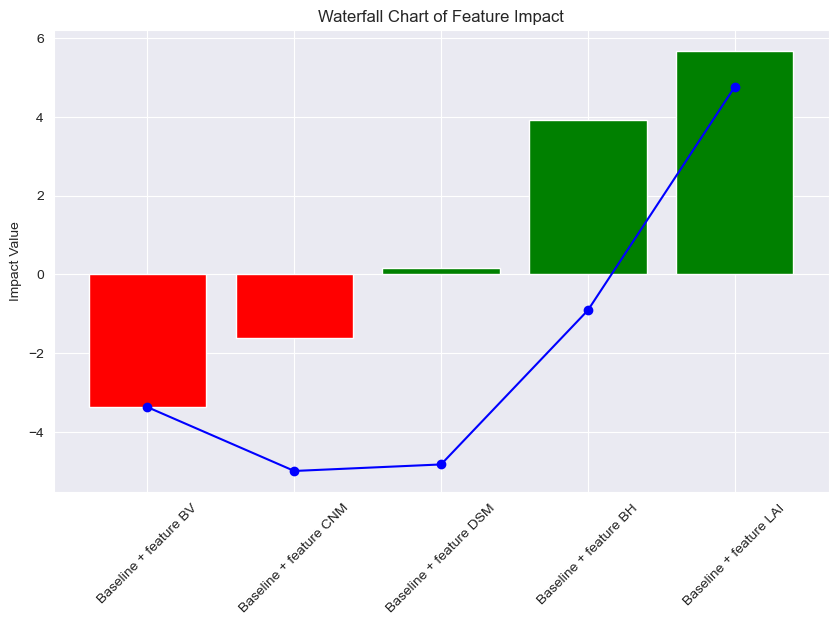

In [44]:
def plot_waterfall(values, title='Waterfall Chart of Feature Impact'):
    cumulative = np.cumsum(list(values.values()))  # 计算累积值
    plt.figure(figsize=(10, 6))

    # 画条形图
    plt.bar(range(len(values)), values.values(), color=['g' if val > 0 else 'r' for val in values.values()])

    # 画累积曲线
    plt.plot(range(len(values)), cumulative, color='b', marker='o')

    plt.xticks(range(len(values)), list(values.keys()), rotation=45)
    plt.ylabel('Impact Value')
    plt.title(title)

    # 保存图像
    plt.savefig('CNN_LSTM_Images/Waterfall_chart_6_2.png')
    plt.show()

plot_waterfall(sorted_impact)


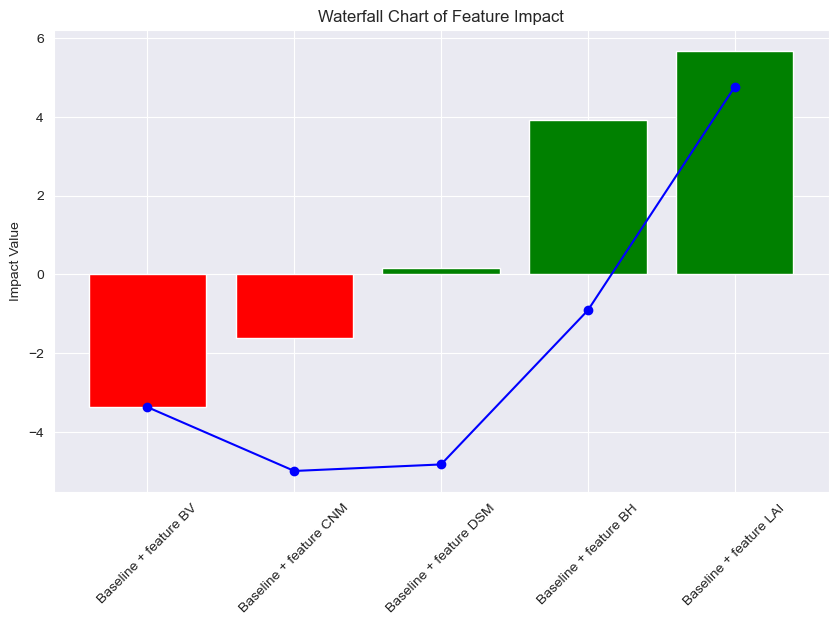

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# 计算每个特征的影响值变化
# 使用负号来修正 BV 和 CNM 的方向
impact_values_final = {key: baseline_all[-1] - results[key][-1] for key in results.keys() if key != 'Baseline' and key != 'Baseline + all 5 features'}

# 按影响值大小排序
sorted_impact = dict(sorted(impact_values_final.items(), key=lambda item: item[1]))

# 瀑布图绘制
def plot_waterfall(values, title='Waterfall Chart of Feature Impact'):
    cumulative = np.cumsum(list(values.values()))
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(values)), values.values(), color=['g' if val > 0 else 'r' for val in values.values()])
    plt.plot(range(len(values)), cumulative, color='b', marker='o')
    plt.xticks(range(len(values)), list(values.keys()), rotation=45)
    plt.ylabel('Impact Value')
    plt.title(title)

    # 保存图像
    plt.savefig('CNN_LSTM_Images/Waterfall_chart_6_1.png')
    plt.show()

plot_waterfall(sorted_impact)


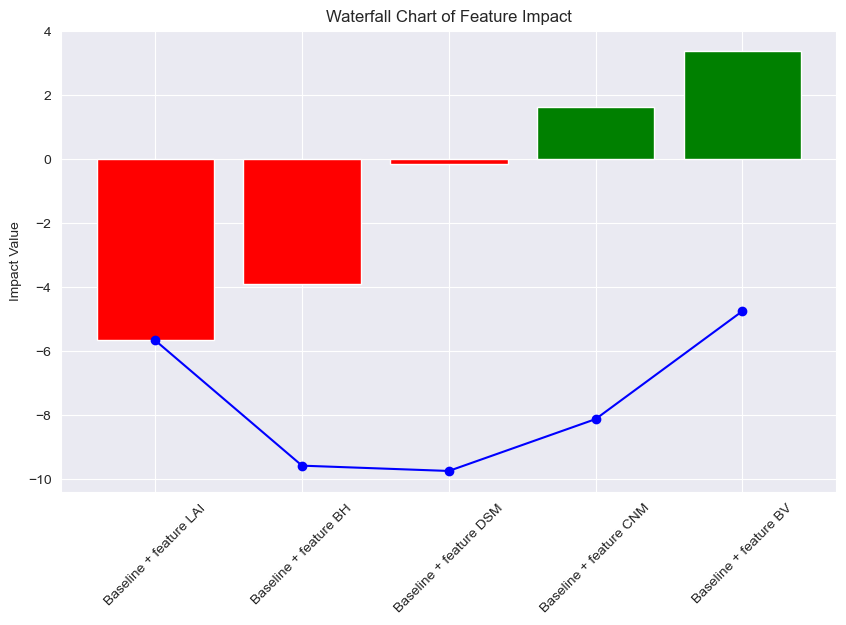

In [32]:
# 绘制瀑布图
import matplotlib.pyplot as plt
import numpy as np

# 计算每个特征的影响值变化
impact_values_final = {key: results[key][-1] - baseline_all[-1] for key in results.keys() if key != 'Baseline' and key != 'Baseline + all 5 features'}

sorted_impact = dict(sorted(impact_values_final.items(), key=lambda item: item[1]))

# 瀑布图绘制
def plot_waterfall(values, title='Waterfall Chart of Feature Impact'):
    cumulative = np.cumsum(list(values.values()))
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(values)), values.values(), color=['g' if val > 0 else 'r' for val in values.values()])
    plt.plot(range(len(values)), cumulative, color='b', marker='o')
    plt.xticks(range(len(values)), list(values.keys()), rotation=45)
    plt.ylabel('Impact Value')
    plt.title(title)
    
    plt.savefig('CNN_LSTM_Images/Waterfall_chart_6.png')
    plt.show()

plot_waterfall(sorted_impact)


这张图展示了每个特征层相对于Baseline + all 5 features的影响值变化。具体含义如下：

Y轴：表示影响值，数值越大表明该特征层对模型预测的贡献越小，甚至可能引入了噪声；数值越小（负值）表明该特征层对预测有更好的提升。
X轴：表示特征层的名称，按照影响值从小到大排序。
瀑布图：瀑布图展示了每个特征层的影响值变化。绿色代表正值，红色代表负值。蓝色线表示累积影响值，即每个特征层的影响值累加和。
从图中可以观察到：

Baseline + feature BV对模型预测的影响值最大，且一直为正值，表明BV层对模型预测有负面影响。
Baseline + feature LAI的影响值一开始为正，后来逐渐减小，甚至变为负值，表明LAI层对模型预测有一定的提升。
Baseline + feature DSM的影响值一直为负，表明DSM层对模型预测有一定的提升。
其他特征层的影响值变化相对较小，对模型预测的影响不明显。


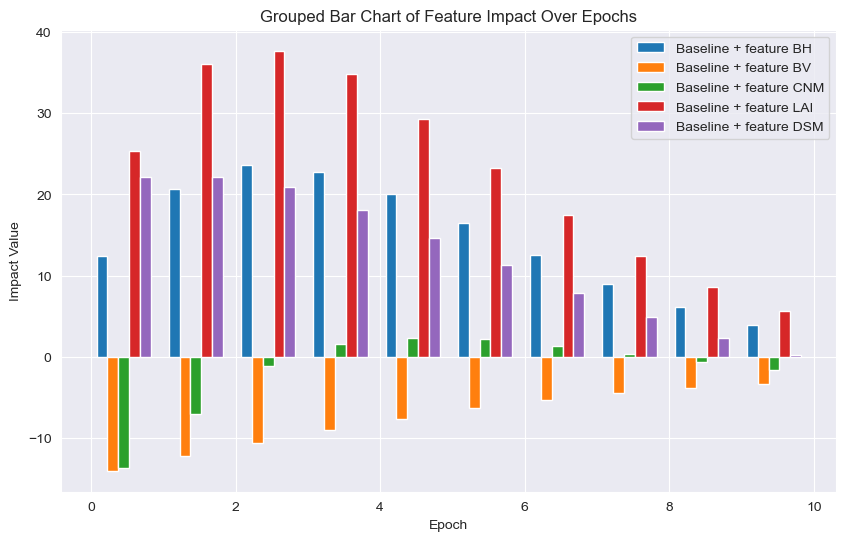

In [33]:
# 分组柱状图
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
x = np.arange(len(results['Baseline + all 5 features']))
width = 0.15

for i, key in enumerate(results.keys()):
    if key != 'Baseline' and key != 'Baseline + all 5 features':
        plt.bar(x + i * width, impact_values[key], width, label=key)

plt.xlabel('Epoch')
plt.ylabel('Impact Value')
plt.title('Grouped Bar Chart of Feature Impact Over Epochs')
plt.legend()

plt.savefig('CNN_LSTM_Images/Grouped_barplot_6.png')
plt.show()


这张图展示了每个特征层相对于所有特征层的影响值随epoch变化的情况。具体含义如下：

Y轴：表示影响值，数值越大表明该特征层对模型预测的贡献越小，甚至可能引入了噪声；数值越小（负值）表明该特征层对预测有更好的提升。
X轴：表示训练的epoch数。
各条线：代表每个特征层相对于Baseline + all 5 features的MSE差异。比如，Baseline + feature LAI的曲线从负值开始，表明在训练初期LAI层对模型有负面影响，随着epoch增加，其影响逐渐减小。

从图中可以观察到：

大部分特征层相对于所有特征层的MSE在初期都有一个较大的差值，这可能是因为模型在初期还未充分学习特征。
随着训练的进行，Baseline + feature BV始终对模型产生了负面影响（MSE差值为正），说明BV层对预测效果有负面作用。
而Baseline + feature LAI的MSE值虽然在初期有较大的负面影响，但随着训练的进行，影响值逐渐减少，甚至接近于零，表明这个特征层在后期对模型预测能力有一定的提升。

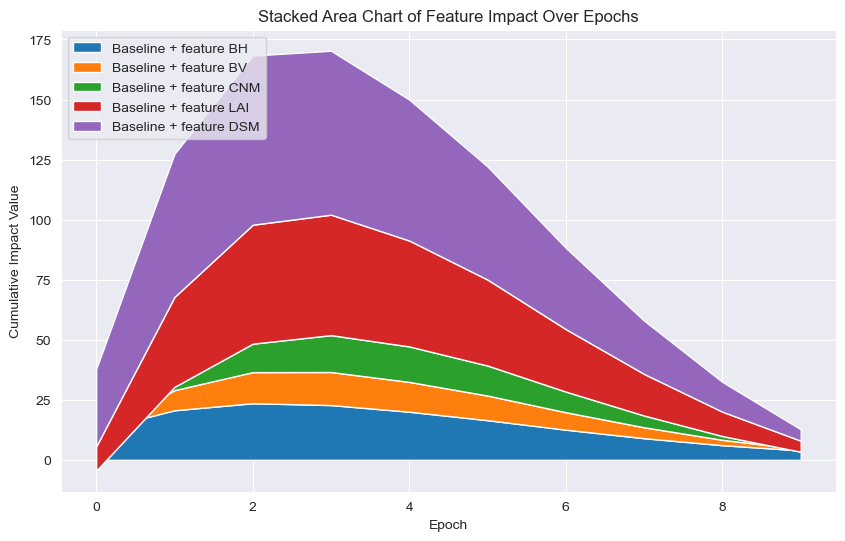

In [34]:
# 堆叠面积图
plt.figure(figsize=(10, 6))
keys = list(impact_values.keys())
impact_cumulative = np.cumsum([impact_values[key] for key in keys], axis=0)
plt.stackplot(range(len(results['Baseline + all 5 features'])), *impact_cumulative, labels=keys)
plt.xlabel('Epoch')
plt.ylabel('Cumulative Impact Value')
plt.title('Stacked Area Chart of Feature Impact Over Epochs')
plt.legend(loc='upper left')

plt.savefig('CNN_LSTM_Images/Stacked_area_chart_6.png')
plt.show()


这张图展示了每个特征层相对于所有特征层的影响值随epoch变化的情况。具体含义如下：

Y轴：表示影响值，数值越大表明该特征层对模型预测的贡献越小，甚至可能引入了噪声；数值越小（负值）表明该特征层对预测有更好的提升。
X轴：表示训练的epoch数。
堆叠面积图：堆叠面积图展示了每个特征层的影响值随epoch的变化。每个颜色代表一个特征层，颜色的堆叠面积表示该特征层的累积影响值。

从图中可以观察到：

大部分特征层的影响值在初期都有一个较大的差值，这可能是因为模型在初期还未充分学习特征。
随着训练的进行，Baseline + feature BV始终对模型产生了负面影响（MSE差值为正），说明BV层对预测效果有负面作用。
而Baseline + feature LAI的MSE值虽然在初期有较大的负面影响，但随着训练的进行，影响值逐渐减小，甚至接近于零，表明这个特征层在后期对模型预测能力有一定的提升。


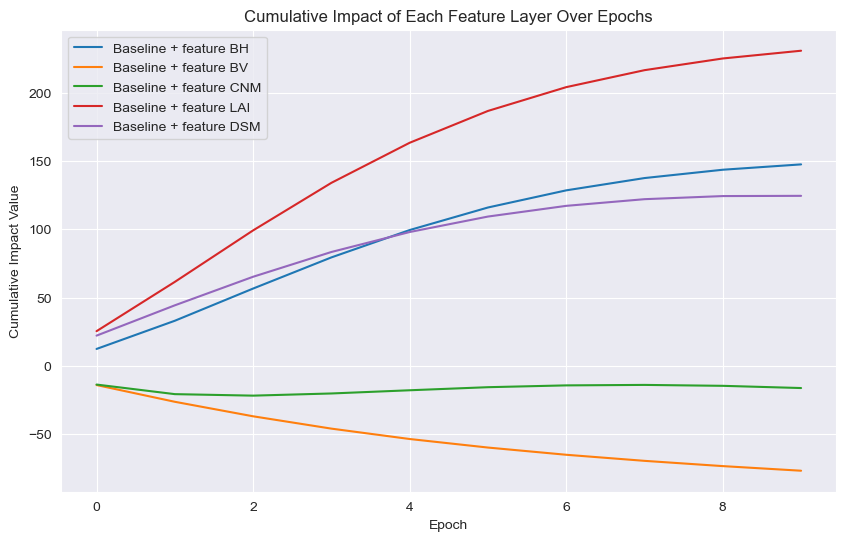

In [35]:
# 
plt.figure(figsize=(10, 6))
for key in impact_values.keys():
    cumulative_impact = np.cumsum(impact_values[key])
    plt.plot(range(len(cumulative_impact)), cumulative_impact, label=key)

plt.xlabel('Epoch')
plt.ylabel('Cumulative Impact Value')
plt.title('Cumulative Impact of Each Feature Layer Over Epochs')
plt.legend()

plt.savefig('CNN_LSTM_Images/Cumulative_impact_plot_6.png')
plt.show()

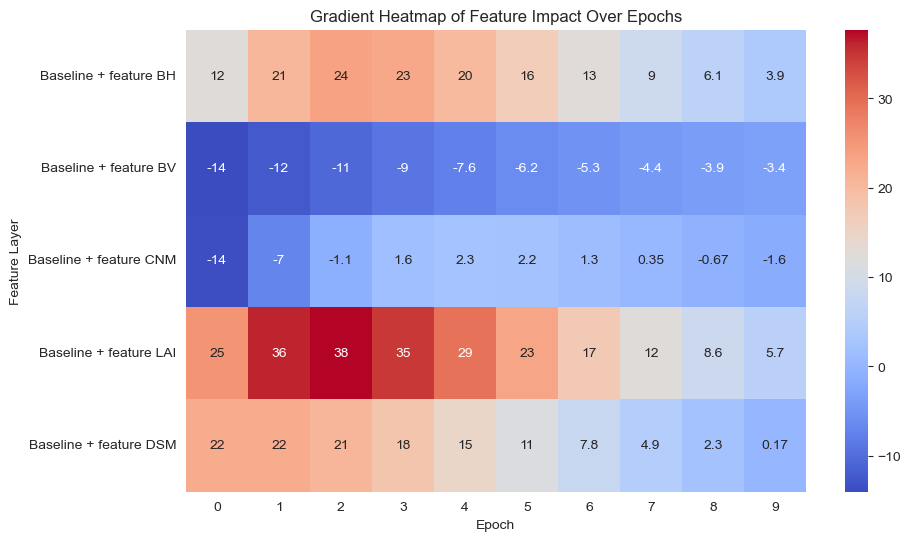

In [36]:
# 渐变热图
import seaborn as sns

cumulative_impact_data = np.array([impact_values[key] for key in impact_values.keys()])

plt.figure(figsize=(10, 6))
sns.heatmap(cumulative_impact_data, cmap='coolwarm', annot=True, xticklabels=range(len(results['Baseline + all 5 features'])), yticklabels=list(impact_values.keys()))
plt.xlabel('Epoch')
plt.ylabel('Feature Layer')
plt.title('Gradient Heatmap of Feature Impact Over Epochs')

plt.savefig('CNN_LSTM_Images/Gradient_heatmap_6.png')
plt.show()
